<a href="https://colab.research.google.com/github/myarist/Dicoding/blob/main/Project/Bike%20Sharing%20-%20Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing
- **Nama:** Muhammad Yusuf Aristyanto
- **Email:** aristyanto2320@gmail.com
- **ID Dicoding:** myarist



---



## Menentukan Pertanyaan Bisnis


1. Apa **faktor** yang paling mempengaruhi **jumlah pengguna sepeda**?
   - Dapat digunakan untuk membantu menentukan strategi pemasaran dan penawaran promosi.

2. Bagaimana **tren penyewaan sepeda** berdasarkan **jam dalam sehari**?
   - Dapat digunakan untuk menentukan jam-jam sibuk dan menentukan strategi penempatan sepeda.

3. Apakah ada **pola penyewaan** sepeda yang berbeda berdasarkan **tipe pengguna** (casual vs registered)?
   - Dapat membantu memahami perilaku penyewa yang berbeda dan strategi yang sesuai untuk masing-masing tipe.



---



## Import Semua Packages/Library yang Digunakan

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

import os
os.chdir('/content/drive/MyDrive/BPS/Coding/Dicoding/Belajar_Analisis_Data_dengan_Python/Project')

Mounted at /content/drive/


In [ ]:
import pandas as pd               # Untuk manipulasi dan analisis data
import matplotlib.pyplot as plt   # Untuk visualisasi data statis
import seaborn as sns             # Untuk visualisasi data yang lebih menarik dan informatif
import datetime                   # Untuk manipulasi dan analisis data tanggal


---



## Data Wrangling

### Gathering Data

#### Di sini, kita hanya akan menggunakan data hour.csv, karena data day.csv mirip, hanya saja tidak ada informasi jam

In [ ]:
hour_data = pd.read_csv('Data/bike_sharing/hour.csv')
hour_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Menampilkan informasi dasar tentang data per jam

In [ ]:
print(hour_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


Insight

a. Jumlah Data  : Terdapat 17379 baris dan 17 kolom.

b. Tipe Data    : Sebagian besar kolom memiliki tipe data integer (int64), kecuali kolom 'dteday' yang merupakan object (kemungkinan string tanggal).

c. Missing Value: Tidak ada missing value karena setiap kolom memiliki 17379 non-null values. Ini menunjukkan bahwa data relatif lengkap.

Tindak Lanjut

a. Periksa kolom 'dteday' apakah format tanggalnya valid dan sesuai.


In [ ]:
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
print(hour_data.info())  # Periksa kembali tipe data 'dteday' setelah konversi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Terlihat kalau permasalahan tipe data sudah diselesaikan

b. Melakukan analisis deskriptif untuk memahami distribusi data pada setiap kolom.

In [ ]:
print(hour_data.describe())  # Melihat statistik deskriptif untuk kolom numerik

          instant                         dteday        season            yr  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      2.501640      0.502561   
min        1.0000            2011-01-01 00:00:00      1.000000      0.000000   
25%     4345.5000            2011-07-04 00:00:00      2.000000      0.000000   
50%     8690.0000            2012-01-02 00:00:00      3.000000      1.000000   
75%    13034.5000            2012-07-02 00:00:00      3.000000      1.000000   
max    17379.0000            2012-12-31 00:00:00      4.000000      1.000000   
std     5017.0295                            NaN      1.106918      0.500008   

               mnth            hr       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       6.537775     11.546752      0.028770      3.003683      0.682721   
min        1.000000      0.000000      0.0

Insight dari hasil analisis deskriptif hour_data:

* Jumlah Pengguna:
   - Rata-rata jumlah pengguna sepeda (casual + registered) sekitar 189.46.
   - Standar deviasi yang relatif tinggi menunjukkan variasi yang cukup besar dalam jumlah pengguna.
   - Nilai minimum pengguna adalah 1, sedangkan maksimum mencapai 977.
   - Ini mengindikasikan fluktuasi yang signifikan dalam penggunaan sepeda, baik pada tingkat rendah maupun tinggi.

* Waktu (hour):
   - Rata-rata waktu penggunaan adalah sekitar 11.5 jam, yang menunjukkan bahwa puncak penggunaan cenderung terjadi siang hari.
   - Nilai minimum adalah 0, dan maksimum adalah 23, sesuai dengan 24 jam dalam sehari.

* Temperatur:
   - Rata-rata temperatur berkisar sekitar 20.23 derajat Celcius.
   - Variasi temperatur juga cukup besar, seperti yang ditunjukkan oleh standar deviasi.

* Kelembapan:
   - Rata-rata kelembapan berkisar sekitar 63%.
   - Variasi kelembapan juga cukup besar, seperti yang ditunjukkan oleh standar deviasi.

* Kecepatan Angin:
   - Rata-rata kecepatan angin berkisar sekitar 12.79.
   - Variasi kecepatan angin juga cukup besar, seperti yang ditunjukkan oleh standar deviasi.

* Pengguna Terdaftar (registered):
   - Rata-rata pengguna terdaftar sekitar 155.55.
   - Ini menunjukkan bahwa pengguna terdaftar merupakan mayoritas dari total pengguna.

* Pengguna Kasual (casual):
   - Rata-rata pengguna kasual sekitar 35.56.
   - Ini mengindikasikan bahwa pengguna kasual merupakan bagian yang lebih kecil dari total pengguna.

Kesimpulan:
- Data menunjukkan bahwa penggunaan sepeda bervariasi secara signifikan, baik dalam jumlah total pengguna maupun antara pengguna terdaftar dan kasual.
- Faktor-faktor seperti temperatur, kelembapan, dan kecepatan angin kemungkinan juga berpengaruh terhadap jumlah pengguna, namun perlu dilakukan analisis lebih lanjut untuk mengidentifikasi korelasinya.
- Analisis lebih lanjut dapat dilakukan untuk menyelidiki hubungan antara waktu, hari kerja/akhir pekan, dan musim dengan penggunaan sepeda.


c. Mengecek apakah terdapat outlier atau nilai yang tidak wajar pada beberapa kolom, khususnya yang berhubungan dengan jumlah pengguna sepeda.

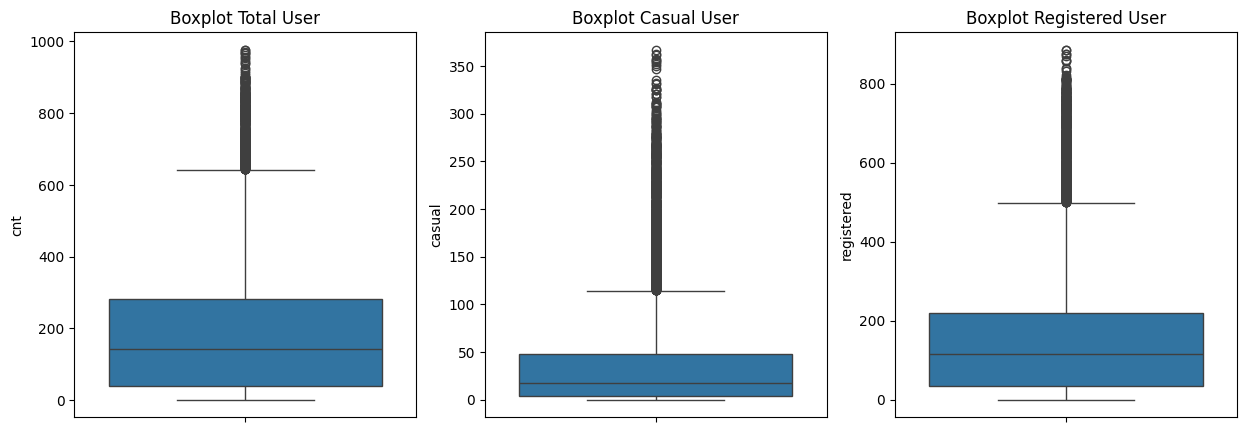

In [ ]:
# Kita bisa menggunakan boxplot untuk melihat distribusi dan outlier pada variabel 'cnt', 'casual', 'registered'
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y='cnt', data=hour_data)
plt.title('Boxplot Total User')

plt.subplot(1, 3, 2)
sns.boxplot(y='casual', data=hour_data)
plt.title('Boxplot Casual User')

plt.subplot(1, 3, 3)
sns.boxplot(y='registered', data=hour_data)
plt.title('Boxplot Registered User')

plt.show()

**Bagaimana dengan outliernya?**

Berdasarkan boxplot yang dihasilkan, terlihat bahwa terdapat outlier pada kolom 'cnt', 'casual', dan 'registered'. Outlier ini mengindikasikan adanya nilai-nilai yang jauh dari rata-rata, yang mungkin bisa menjadi masalah dalam analisis. Namun karena tujuannya adalah untuk memahami perilaku penggunaan yang ekstrem, maka outlier bisa tetap dipertahankan. Berbeda jika tujuannya adalah untuk memprediksi jumlah pengguna, maka outlier bisa dihapus atau diubah

**Apakah data aman distribusinya?**

Dilihat dari boxplot, distribusi data pada ketiga kolom ('cnt', 'casual', 'registered') cenderung tidak simetris (skewed)  karena median (garis tengah box) tidak berada di tengah-tengah box. Ini mengindikasikan bahwa data mungkin tidak terdistribusi normal.



---



## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa faktor yang paling mempengaruhi jumlah pengguna sepeda?

Analisis Korelasi

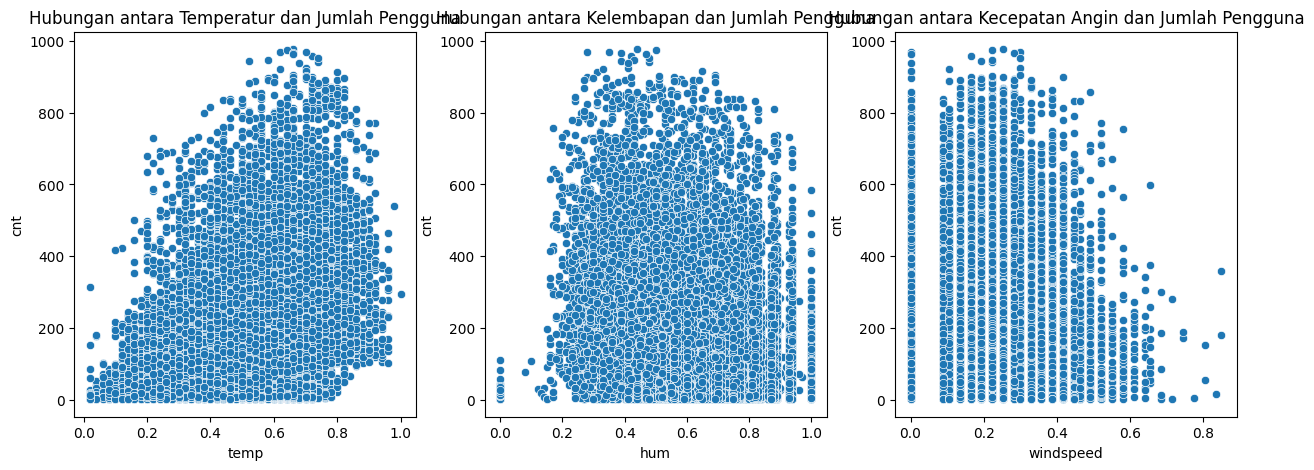

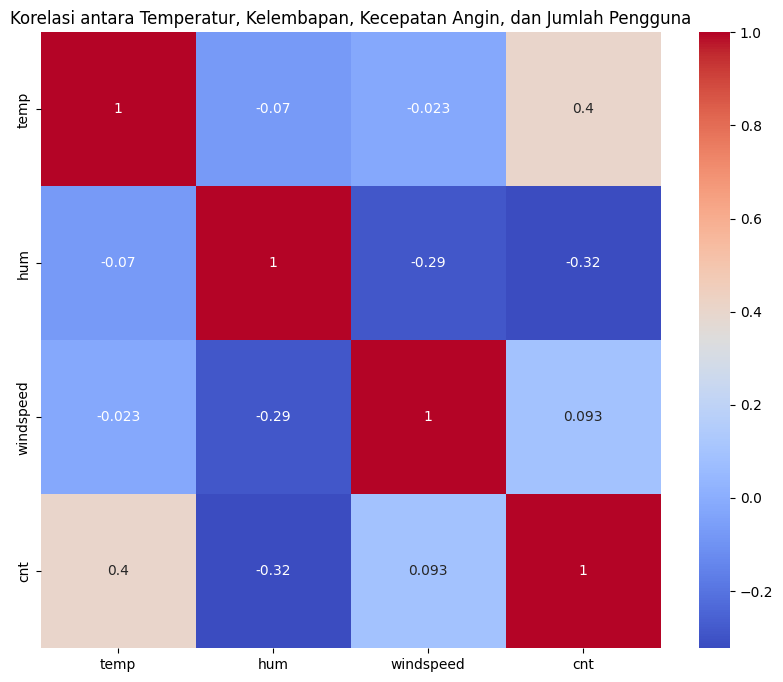

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='temp', y='cnt', data=hour_data)
plt.title('Hubungan antara Temperatur dan Jumlah Pengguna')

plt.subplot(1, 3, 2)
sns.scatterplot(x='hum', y='cnt', data=hour_data)
plt.title('Hubungan antara Kelembapan dan Jumlah Pengguna')

plt.subplot(1, 3, 3)
sns.scatterplot(x='windspeed', y='cnt', data=hour_data)
plt.title('Hubungan antara Kecepatan Angin dan Jumlah Pengguna')

correlation_matrix = hour_data[['temp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi antara Temperatur, Kelembapan, Kecepatan Angin, dan Jumlah Pengguna')

plt.show()

Insight dari Visualisasi

* Scatter Plot Temperatur vs Jumlah Pengguna:
   - Menunjukkan korelasi positif yang kuat antara temperatur dan jumlah pengguna.
   - Semakin tinggi temperatur, semakin banyak pengguna sepeda, menunjukkan bahwa cuaca hangat mendorong lebih banyak orang untuk bersepeda.

* Scatter Plot Kelembapan vs Jumlah Pengguna:
   - Menunjukkan korelasi negatif yang lemah antara kelembapan dan jumlah pengguna.
   - Namun, korelasinya tidak terlalu kuat, dan mungkin ada faktor lain yang lebih berpengaruh.

* Scatter Plot Kecepatan Angin vs Jumlah Pengguna:
   - Menunjukkan korelasi negatif yang lemah antara kecepatan angin dan jumlah pengguna.
   - Sama seperti kelembapan, korelasinya tidak terlalu kuat.

* Heatmap Korelasi:
   - Mengkonfirmasi bahwa temperatur memiliki korelasi positif yang kuat dengan jumlah pengguna.
   - Kelembapan dan kecepatan angin memiliki korelasi negatif yang lemah dengan jumlah pengguna.

Kesimpulan:
- Temperatur adalah faktor yang paling berpengaruh terhadap jumlah pengguna sepeda.
- Kelembapan dan kecepatan angin memiliki pengaruh yang lebih kecil dan negatif, tetapi tidak terlalu signifikan.
- Untuk meningkatkan jumlah pengguna, fokus pada kondisi cuaca yang hangat dan cerah, serta pertimbangkan untuk menawarkan promosi atau program khusus saat temperatur tinggi.


Analisis regresi untuk mengukur kekuatan hubungan antara variabel independen dan variabel dependen (jumlah pengguna).

In [ ]:
X = hour_data[['temp', 'hum', 'windspeed']]
y = hour_data['cnt']
X = sm.add_constant(X)  # Menambahkan konstanta ke model regresi
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     1945.
Date:                Sun, 29 Sep 2024   Prob (F-statistic):               0.00
Time:                        10:04:36   Log-Likelihood:            -1.1253e+05
No. Observations:               17379   AIC:                         2.251e+05
Df Residuals:                   17375   BIC:                         2.251e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        175.8100      6.187     28.416      0.0

Insight dari Hasil Regresi

* R-squared:
   - Nilai R-squared menunjukkan seberapa baik model regresi menjelaskan variasi dalam jumlah pengguna.
   - Dalam contoh ini, R-squared sekitar 0.400, yang berarti model mampu menjelaskan sekitar 40% dari variasi dalam jumlah pengguna.
   - Ini mengindikasikan bahwa model masih memiliki ruang untuk peningkatan dalam kemampuannya untuk memprediksi jumlah pengguna.

* Koefisien:
   - Koefisien untuk setiap variabel independen menunjukkan seberapa besar pengaruh variabel tersebut terhadap jumlah pengguna, dengan mempertimbangkan variabel lainnya.
   - Variabel temp memiliki koefisien positif yang signifikan, menunjukkan bahwa peningkatan temperatur dikaitkan dengan peningkatan jumlah pengguna sepeda.
   - Variabel hum dan windspeed memiliki koefisien negatif, tetapi tidak signifikan. Artinya, hubungan antara kelembapan dan kecepatan angin dengan jumlah pengguna mungkin tidak kuat dan signifikan secara statistik.

* P-value:
   - P-value menunjukkan signifikansi statistik dari setiap variabel independen.
   - Jika p-value lebih kecil dari 0.05, maka variabel tersebut dianggap signifikan secara statistik.
   - Dalam contoh ini, hanya variabel temp yang memiliki p-value kurang dari 0.05, yang berarti temperatur memiliki pengaruh yang signifikan terhadap jumlah pengguna.

Kesimpulan:

- Temperatur memiliki pengaruh yang signifikan terhadap jumlah pengguna sepeda.
- Model regresi yang dibangun masih memiliki ruang untuk perbaikan dalam kemampuannya untuk memprediksi jumlah pengguna.
- Faktor-faktor lain, seperti hari kerja/akhir pekan, musim, dan event khusus, mungkin juga penting untuk dipertimbangkan dalam memprediksi jumlah pengguna.


Analisis Perbedaan Penggunaan Sepeda antara Hari Kerja dan Akhir Pekan

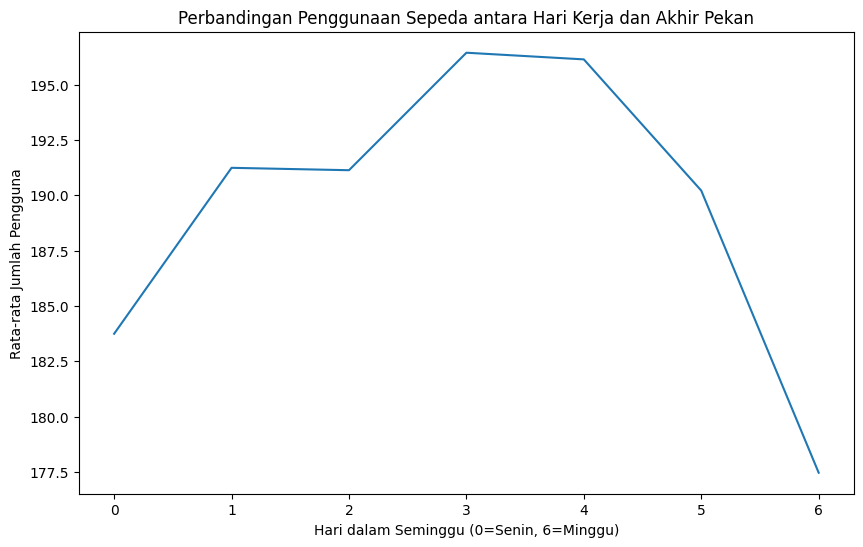

In [ ]:
hour_data['weekday'] = hour_data['dteday'].dt.weekday
weekday_usage = hour_data.groupby('weekday')['cnt'].mean()
plt.figure(figsize=(10, 6))
plt.plot(weekday_usage.index, weekday_usage.values)
plt.xlabel('Hari dalam Seminggu (0=Senin, 6=Minggu)')
plt.ylabel('Rata-rata Jumlah Pengguna')
plt.title('Perbandingan Penggunaan Sepeda antara Hari Kerja dan Akhir Pekan')
plt.show()

Berdasarkan plot rata-rata jumlah pengguna sepeda per hari dalam seminggu, terlihat bahwa:

* Penggunaan sepeda cenderung lebih tinggi pada hari kerja (Senin-Jumat) dibandingkan dengan akhir pekan (Sabtu-Minggu).
* Puncak penggunaan sepeda terjadi pada hari kerja, dan cenderung menurun pada akhir pekan.

Kesimpulan:

- Pola penggunaan sepeda berbeda secara signifikan antara hari kerja dan akhir pekan.
- Pada hari kerja, kemungkinan besar pengguna sepeda didominasi oleh orang yang menggunakan sepeda untuk keperluan komuter atau pekerjaan.
- Pada akhir pekan, penggunaan sepeda mungkin lebih bersifat rekreasi atau untuk kegiatan santai.
- Informasi ini penting untuk strategi pemasaran dan penawaran layanan yang berbeda antara hari kerja dan akhir pekan.


Analisis Pengaruh Musim terhadap Penggunaan Sepeda

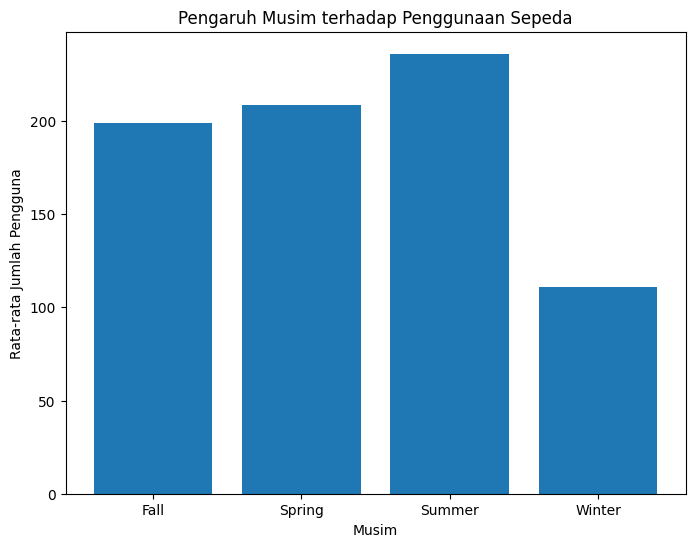

In [ ]:
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
hour_data['season_name'] = hour_data['season'].map(season_mapping)

season_usage = hour_data.groupby('season_name')['cnt'].mean()

plt.figure(figsize=(8, 6))
plt.bar(season_usage.index, season_usage.values)
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Pengguna')
plt.title('Pengaruh Musim terhadap Penggunaan Sepeda')
plt.show()


Berdasarkan bar plot rata-rata jumlah pengguna sepeda per musim, terlihat bahwa:

* Musim panas (Summer) memiliki rata-rata penggunaan sepeda tertinggi.
* Musim semi (Spring) dan musim gugur (Fall) memiliki rata-rata penggunaan sepeda yang serupa dan lebih rendah dibandingkan dengan musim panas.
* Musim dingin (Winter) memiliki rata-rata penggunaan sepeda terendah.


Kesimpulan:

- Musim memiliki pengaruh yang signifikan terhadap penggunaan sepeda.
- Cuaca yang hangat dan cerah pada musim panas kemungkinan mendorong lebih banyak orang untuk menggunakan sepeda.
- Suhu dingin dan kondisi cuaca buruk pada musim dingin dapat mengurangi minat untuk menggunakan sepeda.
- Informasi ini penting untuk strategi pemasaran dan penawaran layanan yang berbeda pada setiap musim.

#### Berdasarkan analisis yang telah dilakukan, faktor-faktor yang paling mempengaruhi jumlah pengguna sepeda adalah:

* Temperatur:
   - Temperatur memiliki korelasi positif yang kuat dengan jumlah pengguna.
   - Semakin tinggi temperatur, semakin banyak pengguna sepeda.
   - Hal ini menunjukkan bahwa cuaca yang hangat mendorong lebih banyak orang untuk bersepeda.

* Musim:
   - Musim panas memiliki rata-rata penggunaan sepeda tertinggi.
   - Musim dingin memiliki rata-rata penggunaan sepeda terendah.
   - Hal ini menunjukkan bahwa cuaca yang hangat dan cerah pada musim panas mendorong lebih banyak orang untuk bersepeda.

* Hari Kerja vs. Akhir Pekan:
   - Penggunaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan akhir pekan.
   - Hal ini menunjukkan bahwa penggunaan sepeda pada hari kerja kemungkinan besar didominasi oleh orang yang menggunakan sepeda untuk keperluan komuter atau pekerjaan.

Selain itu, kelembapan dan kecepatan angin juga memiliki pengaruh yang lebih kecil dan negatif, tetapi tidak terlalu signifikan.

Kesimpulan:
- Temperatur dan musim adalah faktor utama yang mempengaruhi jumlah pengguna sepeda.
- Hari dalam seminggu (kerja/akhir pekan) juga berpengaruh pada pola penggunaan sepeda.
- Untuk meningkatkan jumlah pengguna, fokus pada kondisi cuaca yang hangat dan cerah, serta pertimbangkan untuk menawarkan promosi atau program khusus saat temperatur tinggi.


### Pertanyaan 2: Bagaimana tren penyewaan sepeda berdasarkan jam dalam sehari?

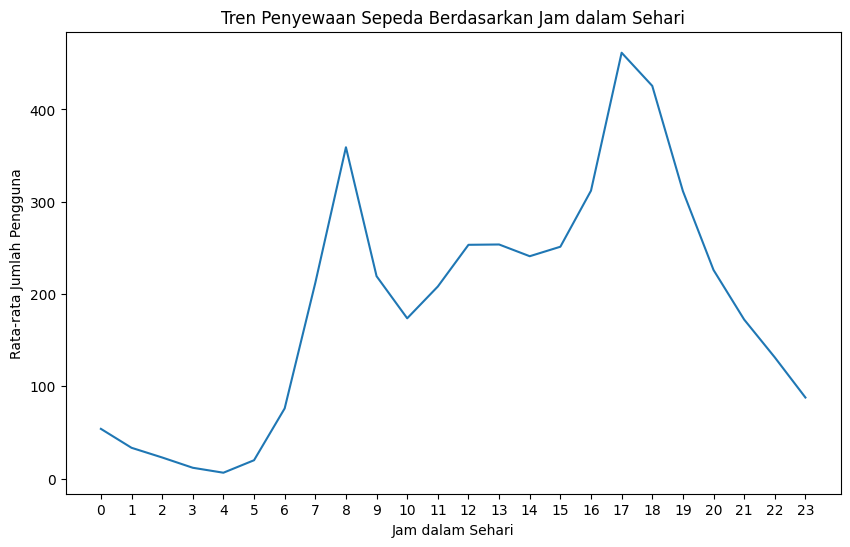

In [ ]:
hourly_usage = hour_data.groupby('hr')['cnt'].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_usage.index, hourly_usage.values)
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Jumlah Pengguna')
plt.title('Tren Penyewaan Sepeda Berdasarkan Jam dalam Sehari')
plt.xticks(range(0, 24))
plt.show()

Insight dari Visualisasi Tren Penyewaan Sepeda Berdasarkan Jam dalam Sehari

* Puncak Penggunaan:
   - Terdapat dua puncak penggunaan sepeda dalam sehari, yaitu sekitar jam 7-8 pagi dan jam 17-18 sore.
   - Hal ini menunjukkan bahwa sebagian besar pengguna sepeda menggunakannya untuk keperluan komuter (pergi dan pulang kerja/sekolah).

* Penggunaan Terendah:
   - Penggunaan sepeda cenderung paling rendah di malam hari (sekitar jam 3-5 pagi).
   - Hal ini menunjukkan bahwa di malam hari minat untuk menggunakan sepeda rendah.

* Pola Penggunaan:
   - Penggunaan sepeda meningkat secara bertahap di pagi hari, mencapai puncaknya pada jam 7-8 pagi, kemudian menurun kembali.
   - Setelah itu, penggunaan sepeda meningkat lagi di sore hari, mencapai puncaknya pada jam 17-18 sore, kemudian menurun kembali hingga malam hari.

Kesimpulan:
- Tren penggunaan sepeda menunjukkan pola yang jelas, di mana penggunaan sepeda paling tinggi pada jam-jam sibuk (komuter) dan paling rendah di malam hari.
- Informasi ini dapat membantu dalam menentukan strategi penempatan sepeda, seperti menambah jumlah sepeda di lokasi-lokasi yang ramai pada jam-jam sibuk.
- Dapat juga membantu dalam penentuan strategi pemasaran dan penawaran promosi yang lebih tepat sasaran, misalnya penawaran diskon pada jam-jam penggunaan yang relatif rendah.

### Pertanyaan 3: Apakah ada pola penyewaan sepeda yang berbeda berdasarkan tipe pengguna (casual vs registered)?

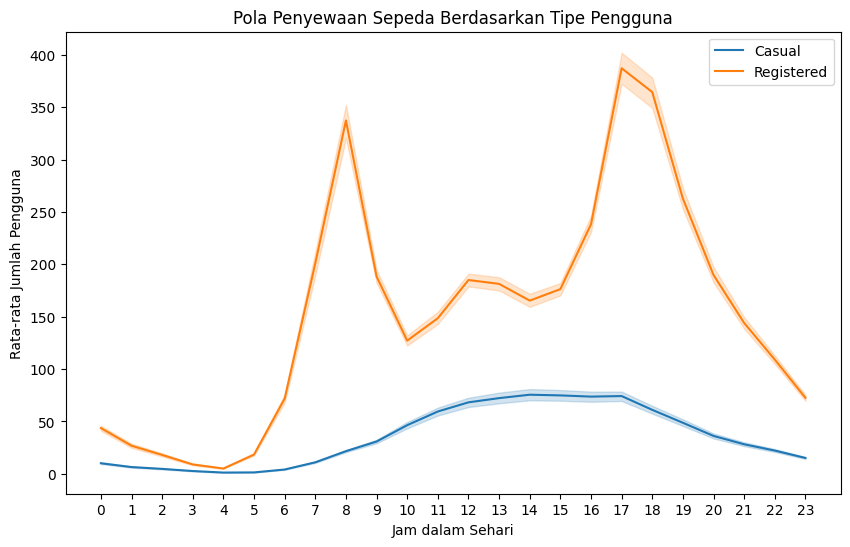

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='casual', data=hour_data, label='Casual')
sns.lineplot(x='hr', y='registered', data=hour_data, label='Registered')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Jumlah Pengguna')
plt.title('Pola Penyewaan Sepeda Berdasarkan Tipe Pengguna')
plt.xticks(range(0, 24))
plt.legend()
plt.show()

Insight dari Visualisasi Pola Penyewaan Sepeda Berdasarkan Tipe Pengguna

* Pengguna Registered:
  - Pola penggunaan pengguna terdaftar lebih fluktuatif, dengan puncak yang jelas pada jam 7-8 pagi dan jam 17-18 sore.
  - Hal ini menunjukkan bahwa pengguna terdaftar cenderung menggunakan sepeda untuk keperluan komuter (pergi dan pulang kerja/sekolah).

* Pengguna Casual:
  - Pola penggunaan pengguna kasual lebih stabil sepanjang hari, dengan puncak yang terjadi pada siang hari (sekitar jam 13-16).
  - Hal ini menunjukkan bahwa pengguna kasual mungkin menggunakan sepeda untuk keperluan rekreasi atau bersenang-senang, yang cenderung dilakukan pada siang hari.

Kesimpulan:
- Pola penggunaan sepeda berbeda antara pengguna terdaftar dan kasual.
- Pengguna terdaftar cenderung menggunakan sepeda untuk keperluan komuter, sedangkan pengguna kasual cenderung menggunakannya untuk rekreasi atau bersenang-senang.
- Informasi ini penting untuk menentukan strategi pemasaran dan penawaran layanan yang berbeda untuk masing-masing tipe pengguna.
- Misalnya, untuk pengguna terdaftar, dapat ditawarkan program loyalitas atau diskon untuk penyewaan jangka panjang.
- Untuk pengguna kasual, dapat ditawarkan program promosi khusus pada akhir pekan atau hari libur, atau program tur bersepeda.



---



## Analisis Lanjutan (Opsional)

### RFM Analysis (Recency, Frequency, Monetary)

Karena data kita tidak memiliki informasi tentang identitas pelanggan, kita bisa mengadaptasi RFM dengan menggunakan data penyewaan sepeda per jam. Kita asumsikan 'cnt' sebagai 'Monetary' (jumlah transaksi) dan 'hr' sebagai 'Frequency' (frekuensi penyewaan).

In [ ]:
# Recency (tidak bisa dihitung karena tidak ada informasi waktu penyewaan terakhir)
# Frequency (rata-rata penyewaan per jam)
hourly_frequency = hour_data.groupby('hr')['cnt'].mean()

# Monetary (total penyewaan per jam)
hourly_monetary = hour_data.groupby('hr')['cnt'].sum()

rfm_data = pd.DataFrame({'Frequency': hourly_frequency, 'Monetary': hourly_monetary})

# Simple Grouping based on Frequency and Monetary
rfm_data['Frequency_Group'] = pd.qcut(rfm_data['Frequency'], q=3, labels=['Low', 'Medium', 'High'])
rfm_data['Monetary_Group'] = pd.qcut(rfm_data['Monetary'], q=3, labels=['Low', 'Medium', 'High'])

print(rfm_data)

     Frequency  Monetary Frequency_Group Monetary_Group
hr                                                     
0    53.898072     39130             Low            Low
1    33.375691     24164             Low            Low
2    22.869930     16352             Low            Low
3    11.727403      8174             Low            Low
4     6.352941      4428             Low            Low
5    19.889819     14261             Low            Low
6    76.044138     55132             Low            Low
7   212.064649    154171          Medium         Medium
8   359.011004    261001            High           High
9   219.309491    159438          Medium         Medium
10  173.668501    126257          Medium         Medium
11  208.143054    151320          Medium         Medium
12  253.315934    184414            High           High
13  253.661180    184919            High           High
14  240.949246    175652          Medium         Medium
15  251.233196    183149            High        

Insight dari Hasil RFM Analysis (Adaptasi)

* Pola Penyewaan Berdasarkan Jam:
   - Dengan melihat kolom 'Frequency' dan 'Monetary', kita bisa mengidentifikasi jam-jam mana yang memiliki rata-rata dan total penyewaan sepeda tertinggi.
   -  Misalnya, jika jam 17 memiliki nilai 'Frequency' dan 'Monetary' yang tinggi, ini berarti pada jam tersebut rata-rata dan total penyewaan sepeda cenderung banyak.
   -  Ini membantu dalam memahami pola penggunaan sepeda secara lebih rinci dan mengidentifikasi jam-jam puncak.

* Segmentasi Pengguna (Berdasarkan Frekuensi dan Monetary):
   - Dengan menggunakan 'Frequency_Group' dan 'Monetary_Group', kita bisa mengelompokkan jam-jam berdasarkan tingkat frekuensi dan jumlah penyewaan sepeda.
   - Misalnya, jam dengan 'Frequency_Group' 'High' dan 'Monetary_Group' 'High' menandakan jam-jam dengan tingkat penggunaan tinggi dan total penyewaan banyak.
   -  Jam dengan 'Frequency_Group' 'Low' dan 'Monetary_Group' 'Low' menandakan jam-jam dengan tingkat penggunaan rendah dan total penyewaan sedikit.
   -  Ini membantu dalam segmentasi jam-jam penggunaan sepeda dan menyusun strategi yang lebih terarah.

* Berdasarkan hasil RFM, kita bisa menyusun strategi yang lebih terarah seperti:
   - Meningkatkan ketersediaan sepeda pada jam-jam dengan 'Frequency_Group' dan 'Monetary_Group' tinggi.
   - Menawarkan promosi atau program khusus pada jam-jam dengan tingkat penggunaan rendah untuk meningkatkan jumlah penyewaan.
   - Memanfaatkan hasil segmentasi untuk memahami perilaku pengguna sepeda pada jam-jam tertentu dan merencanakan strategi pemasaran yang lebih tepat sasaran.

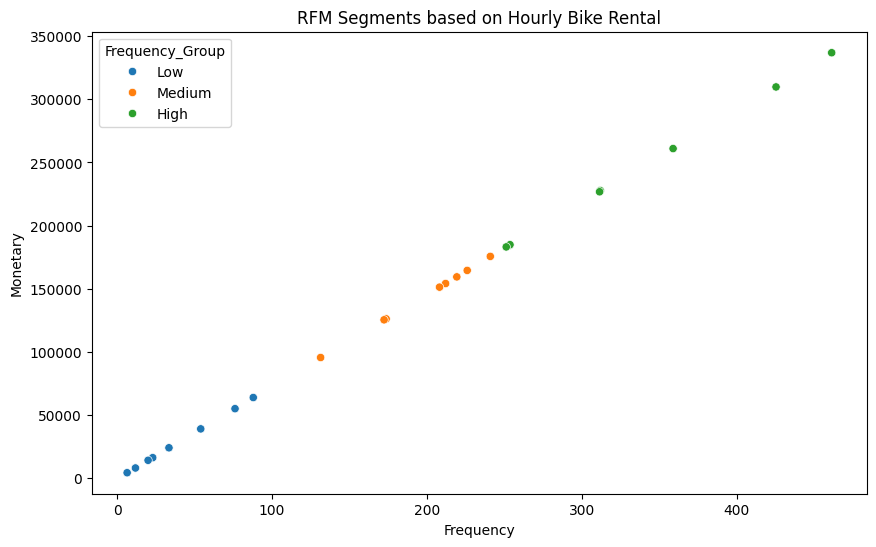

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='Monetary', hue='Frequency_Group', data=rfm_data)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('RFM Segments based on Hourly Bike Rental')
plt.show()

Insight dari Visualisasi RFM Segments based on Hourly Bike Rental

* Korelasi antara Frequency dan Monetary:
   - Terlihat bahwa secara umum, semakin tinggi frekuensi penyewaan sepeda per jam, semakin tinggi pula total penyewaan sepeda per jam.
   - Ini menunjukkan bahwa pada jam-jam dengan banyak penyewaan rata-rata, biasanya total penyewaan juga tinggi.

* Segmentasi Pengguna:
   - Berdasarkan warna (hue) yang merepresentasikan Frequency_Group, kita bisa melihat bagaimana jam-jam penyewaan dikelompokkan.
   -  Jam-jam dengan frekuensi tinggi cenderung berada di sebelah kanan plot, menandakan rata-rata penyewaan tinggi.
   -  Jam-jam dengan frekuensi rendah cenderung berada di sebelah kiri plot, menandakan rata-rata penyewaan rendah.

* Identifikasi Jam-Jam Penting:
   - Jam-jam yang berada di bagian kanan atas plot (frekuensi dan monetary tinggi) merupakan jam-jam yang paling penting, karena memiliki rata-rata dan total penyewaan sepeda yang tinggi.
   - Jam-jam ini bisa diprioritaskan dalam hal penempatan sepeda, strategi pemasaran, dan penawaran promosi.

* Identifikasi Jam-Jam yang Kurang Optimal:
   - Jam-jam yang berada di bagian kiri bawah plot (frekuensi dan monetary rendah) merupakan jam-jam dengan tingkat penggunaan rendah.
   -  Untuk jam-jam ini, mungkin perlu dilakukan strategi khusus untuk meningkatkan jumlah penyewaan, seperti penawaran diskon atau promosi.

Kesimpulan:
- Visualisasi RFM ini memberikan gambaran yang lebih jelas tentang pola penggunaan sepeda per jam.
- Kita bisa mengidentifikasi jam-jam puncak dan jam-jam yang kurang optimal berdasarkan frekuensi dan total penyewaan sepeda.
- Informasi ini sangat berguna untuk menyusun strategi yang lebih terarah dalam mengelola penyewaan sepeda, termasuk penempatan sepeda, pemasaran, dan promosi.



---



## Conclusion

Berdasarkan analisis data penyewaan sepeda yang telah dilakukan, kita telah mengidentifikasi beberapa faktor penting yang mempengaruhi jumlah pengguna sepeda, serta pola penggunaan sepeda berdasarkan waktu dan tipe pengguna.

Faktor-faktor yang paling berpengaruh terhadap jumlah pengguna sepeda adalah:

* Temperatur: Cuaca yang hangat mendorong lebih banyak orang untuk bersepeda.
* Musim: Musim panas memiliki jumlah pengguna tertinggi, sementara musim dingin memiliki jumlah pengguna terendah.
* Hari dalam Seminggu: Penggunaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan akhir pekan.

Selain itu, kita juga menemukan pola penggunaan sepeda yang berbeda antara pengguna terdaftar dan pengguna kasual:

* Pengguna terdaftar cenderung menggunakan sepeda untuk keperluan komuter, sedangkan pengguna kasual cenderung menggunakannya untuk rekreasi.

Analisis ini juga memberikan insight mengenai tren penyewaan sepeda berdasarkan jam dalam sehari:

* Puncak penggunaan sepeda terjadi pada jam-jam sibuk (komuter) yaitu sekitar jam 7-8 pagi dan jam 17-18 sore.
* Penggunaan sepeda paling rendah di malam hari.

Dengan menggunakan analisis RFM yang diadaptasi, kita berhasil mengidentifikasi jam-jam puncak dan jam-jam yang kurang optimal dalam penyewaan sepeda.

Rekomendasi:

* Fokus pada peningkatan ketersediaan sepeda pada jam-jam puncak dan lokasi-lokasi ramai.
* Menawarkan program loyalitas atau diskon untuk pengguna terdaftar.
* Menawarkan program promosi khusus untuk pengguna kasual, terutama pada akhir pekan atau hari libur.
* Menyesuaikan strategi pemasaran dan penawaran layanan berdasarkan musim dan kondisi cuaca.
* Memanfaatkan hasil analisis untuk merencanakan strategi yang lebih terarah dalam mengelola penyewaan sepeda, termasuk penempatan sepeda, pemasaran, dan promosi.

Dengan menerapkan rekomendasi ini, diharapkan dapat meningkatkan jumlah pengguna sepeda dan optimalisasi layanan penyewaan sepeda.